# Importing data from Kaggle

In [1]:
pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"vedantphuse","key":"c3ae690b518eda304dd5b9f685c94806"}'}

In [3]:
! mkdir ~/.kaggle

In [4]:
! cp kaggle.json ~/.kaggle/

In [5]:
#giving permissions
! chmod 600 ~/.kaggle/kaggle.json

In [6]:
! kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 609M/612M [00:17<00:00, 36.7MB/s]
100% 612M/612M [00:17<00:00, 36.5MB/s]


In [7]:
!unzip gtsrb-german-traffic-sign.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/5/00005_00053_00011.png  
  inflating: train/5/00005_00053_00012.png  
  inflating: train/5/00005_00053_00013.png  
  inflating: train/5/00005_00053_00014.png  
  inflating: train/5/00005_00053_00015.png  
  inflating: train/5/00005_00053_00016.png  
  inflating: train/5/00005_00053_00017.png  
  inflating: train/5/00005_00053_00018.png  
  inflating: train/5/00005_00053_00019.png  
  inflating: train/5/00005_00053_00020.png  
  inflating: train/5/00005_00053_00021.png  
  inflating: train/5/00005_00053_00022.png  
  inflating: train/5/00005_00053_00023.png  
  inflating: train/5/00005_00053_00024.png  
  inflating: train/5/00005_00053_00025.png  
  inflating: train/5/00005_00053_00026.png  
  inflating: train/5/00005_00053_00027.png  
  inflating: train/5/00005_00053_00028.png  
  inflating: train/5/00005_00053_00029.png  
  inflating: train/5/00005_00054_00000.png  
  inflating: train/5/00005_00054_00001.png  
  in

# Preparing Data

In [8]:
# Importing Libraries
import os
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random

# Making sure that the graphs some in the notebook itself
%matplotlib inline

In [9]:
# Empty lists for data and labels
data = []
labels = []

# We have 43 Classes
classes = 43

# Path for future use
cur_path = '/content/'

# Loading Data

In [10]:
# using PIL to read images
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    for a in images:
        try: #using try and except for ease of coding
            image = Image.open(path + '/'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)

In [11]:
# Converting data to numpy array
data = np.array(data)
labels = np.array(labels)

In [12]:
#Checking the shape of the input and labels
print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


In [13]:
# Using sklearn for splitting the training data for training and validation
from sklearn.model_selection import train_test_split

In [14]:
# Splitting the training data
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [15]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [16]:
# One Hot encoding the traffic signs using to_categorical from Keras
from keras.utils import to_categorical

In [17]:
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

In [18]:
# Checking if the one hot encoding worked
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


# Buiding a CNN Model

In [19]:
# Using Keras to build the model
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

In [20]:
# Building a CNN model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
# We have 43 classes that's why we have defined 43 in the dense
model.add(Dense(43, activation='softmax'))

In [21]:
#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the Model

In [22]:
epochs = 10
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/10
491/491 [==============================] - 121s 247ms/step - loss: 2.5454 - accuracy: 0.4020 - val_loss: 0.7416 - val_accuracy: 0.8454
Epoch 2/10
491/491 [==============================] - 121s 247ms/step - loss: 0.8021 - accuracy: 0.7686 - val_loss: 0.2703 - val_accuracy: 0.9286
Epoch 3/10
491/491 [==============================] - 121s 247ms/step - loss: 0.4480 - accuracy: 0.8699 - val_loss: 0.1312 - val_accuracy: 0.9694
Epoch 4/10
491/491 [==============================] - 121s 247ms/step - loss: 0.3128 - accuracy: 0.9073 - val_loss: 0.0837 - val_accuracy: 0.9833
Epoch 5/10
491/491 [==============================] - 121s 247ms/step - loss: 0.2448 - accuracy: 0.9287 - val_loss: 0.0681 - val_accuracy: 0.9846
Epoch 6/10
491/491 [==============================] - 122s 248ms/step - loss: 0.2093 - accuracy: 0.9401 - val_loss: 0.1003 - val_accuracy: 0.9755
Epoch 7/10
491/491 [==============================] - 122s 248ms/step - loss: 0.1910 - accuracy: 0.9462 - val_loss: 0.0594 -

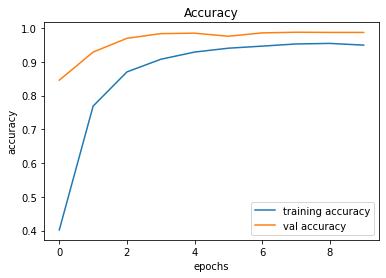

In [23]:
# Plotting the accuracy change with epochs
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

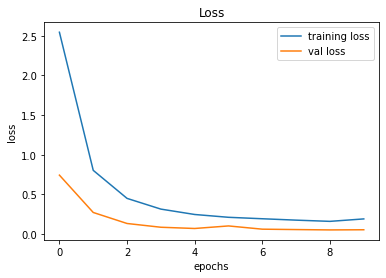

In [24]:
# Plotting the loss change with epochs
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the model

In [25]:
import pandas as pd

In [26]:
# Loading the test data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    label = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data=[]
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30,30))
        data.append(np.array(image))
    X_test=np.array(data)
    return X_test,label

In [27]:
X_test, label = testing('Test.csv')

In [28]:
Y_pred = model.predict_classes(X_test)
Y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([16,  1, 38, ...,  2,  7, 10])

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(label, Y_pred))

0.9517814726840855
